Start this in your projectfolder in the terminal to be in the right development environment
pipenv install jupyter
pipenv shell
pipenv run jupyter notebook

In [2]:
import os
from os import listdir, makedirs, listdir, mkdir
from os.path import exists, join
import glob
import zipfile
import requests 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

from deepface import DeepFace
import matplotlib.pyplot as plt

Directory  /home/thien /.deepface created
Directory  /home/thien /.deepface/weights created


In [3]:
import torch
import torchvision
import torch.nn
from torch.utils.data import Dataset, Subset, random_split
from torchvision import transforms

In [4]:
def face_alignment(imgname):
    detected_face = DeepFace.detectFace(imgname)
    return detected_face

In [4]:
LFW_raw_zip ="http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz"
LFW_deepfunneled_aligned_zip = "http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz"
LFW_funneled_aligned_zip = "http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz"
"""
req = requests.get(LFW_deepfunneled_aligned_zip, allow_redirects=True)
open("LFW.zip", 'wb').write(req.content)

if not exists('./data'):
  makedirs('./data/')

with zipfile.ZipFile('LFW.zip', 'r') as zp1:
  zp1.extractall('data')
"""
target_folder = './data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/'

image_all_filenames = []
classes = listdir(join(target_folder))

for x in classes:
    temp_class_folder = listdir(join(target_folder, x))
    if len(temp_class_folder) > 1:
        for i in temp_class_folder: 
            image_all_filenames.append(join(target_folder, x, i))
    else:
        continue
            
print(len(classes))
print(len(image_all_filenames))
print(image_all_filenames[random.randrange(9164)])
label_split_1 = image_all_filenames[random.randrange(9164)].split("\\")
print(label_split_1)
label = label_split_1[0].split("/")[-1]
print(label)



5749
9164
./data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/George_W_Bush\George_W_Bush_0489.jpg
['./data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/Mike_Weir', 'Mike_Weir_0005.jpg']
Mike_Weir


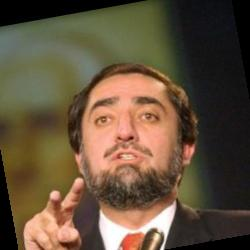

In [5]:
image = Image.open(image_all_filenames[random.randrange(9164)])
image

In [6]:
image_path = image_all_filenames[random.randrange(9164)]
image = Image.open(image_path)     
trans_to_tens = transforms.ToTensor()
torch_image = trans_to_tens(image)
label_split_1 = image_path.split("\\")
image_label = label_split_1[0].split("/")[-1]

print(image_path)
print(image_label)
print(torch_image.shape)

./data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/Arnold_Schwarzenegger\Arnold_Schwarzenegger_0031.jpg
Arnold_Schwarzenegger
torch.Size([3, 250, 250])


In [7]:
target_folder = './data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/'

negative_rd_faces = random.choice(listdir(join(target_folder)))
print(negative_rd_faces)
negative_image = join(target_folder, negative_rd_faces, random.choice(listdir(join(target_folder, negative_rd_faces))))
print(negative_image)

Abdul_Majeed_Shobokshi
./data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/Abdul_Majeed_Shobokshi\Abdul_Majeed_Shobokshi_0001.jpg


torch.Size([224, 224, 3])
<class 'torch.Tensor'>


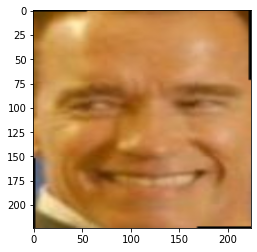

In [8]:
r = face_alignment(image_path)
plt.imshow(r)

s = torch.from_numpy(r.copy())
print(s.shape)
print(type(s))

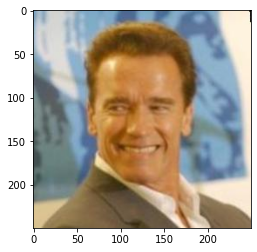

In [9]:
img = Image.open(image_path)
trans_to_pilimage = transforms.ToPILImage()
trans_to_tens = transforms.ToTensor()
plt.imshow(trans_to_pilimage(trans_to_tens(img)))

In [10]:
class LFWDataset(Dataset):
    def __init__(self, image_filenames, target_folder):
        self.image_filenames = image_filenames
        self.target_folder = target_folder
        
        
    def __len__(self):
        return len(self.image_filenames)
    
    
    def __getitem__(self, idx):
        label, cropped_face = self.load_anchor(idx)
        positive_cropped_face, positive_label = self.load_positive(label, idx)
        negative_cropped_face, negative_label = self.load_negative(label)
        
                return cropped_face, label, positive_cropped_face, positive_label, negative_cropped_face, negative_label
        
        
    def load_anchor(self, idx):
        image = Image.open(self.image_filenames[idx])      
        label_split = self.image_filenames[idx].split("\\")
        image_label = label_split[0].split("/")[-1]    
        
        cropped_face_numpy = face_alignment(self.image_filenames[idx])
        np.transpose(cropped_face_numpy, (1, 2, 0))
        cropped_face_tensor = torch.from_numpy(cropped_face_numpy.copy())
        
        return image_label, cropped_face_tensor       
        
        
    def load_positive(self, image_label, idx):   
        #target_folder = './data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/'
        target_folder = self.target_folder
        list_person_faces = listdir(join(target_folder, image_label))        
        
        positive_image_filename = join(target_folder, image_label, random.choice(list_person_faces))
        while positive_image_filename == self.image_filenames[idx]:
            positive_image_filename = join(target_folder, image_label, random.choice(list_person_faces))

        positive_image = Image.open(positive_image_filename)      
        positive_label_split = positive_image_filename.split("\\")
        positive_image_label = label_split[0].split("/")[-1]    
        #(print(positive_image_label))
        
        positive_cropped_face_numpy = face_alignment(positive_image_filename)
        np.transpose(positive_cropped_face_numpy, (1, 2, 0))
        positive_cropped_face_tensor = torch.from_numpy(positive_cropped_face_numpy.copy())
        
        return positive_cropped_face_tensor, positive_image_label
        
        
    def load_negative(self, image_label)
        target_folder = self.target_folder
        list_person_faces = listdir(join(target_folder)
        negative_image_label = random.choice(list_person_faces))
        while negative_image_label == image_label:
            negative_image_label = random.choice(listdir(join(target_folder)))
        negative_image_filename = join(target_folder, negative_image_label, random.choice(listdir(join(target_folder, negative_image_label))))
        
        negative_image = Image.open(negative_image_filename)      
        negative_cropped_face_numpy = face_alignment(negative_image_filename)
        np.transpose(negative_cropped_face_numpy, (1, 2, 0))
        negative_cropped_face_tensor = torch.from_numpy(negative_cropped_face_numpy.copy())
        
        return negative_cropped_face_tensor, negative_image_label

In [11]:
target_folder = './data/lfw-deepfunneled/lfw-deepfunneled/lfw-deepfunneled/'
data_class = LFWDataset(image_all_filenames, target_folder)
train_len = int(0.8*len(data_class))
training_data, validation_data = random_split(data_class, [train_len, len(data_class) - train_len])

In [12]:
#Create PyTorch dataloaders for train and validation datasets.

batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                           batch_size=batch_size,
                                           num_workers=4,
                                           shuffle=True, sampler=None,
                                           collate_fn=None)

val_loader = torch.utils.data.DataLoader(dataset=validation_data,
                                           batch_size=batch_size,
                                           num_workers=4,
                                           shuffle=False, sampler=None,
                                           collate_fn=None)
print(len(train_loader))
print(len(val_loader))

459
115


Hu_Jintao
['Hu_Jintao']


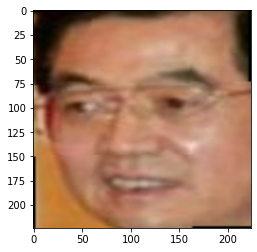

torch.Size([224, 224, 3])
['Hu_Jintao']


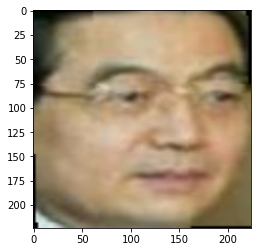

torch.Size([224, 224, 3])
['Jose_Santos']


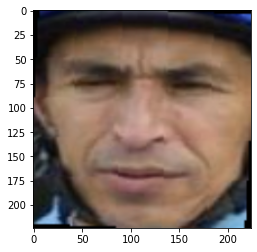

torch.Size([224, 224, 3])


In [14]:
#Image test
def imshow(img):
    img = img #*255 #/2 + 0.5 # unnormalize 
    npimg = img.numpy()
    plt.imshow(npimg)    #,  cmap='gray')
    #plt.imshow(np.transpose(npimg ,(1, 2, 0)))
    plt.show() 

pic_lst = []
label_lst = []
positive_pic_lst = []
positive_label_lst = []
negative_pic_lst = []
negative_label_lst = []
for x in range(1):
    i = random.randint(0, 9164)
    images, label, positive_images, positive_label, negative_images, negative_label = data_class[i]
    pic_lst.append(images)
    label_lst.append(label)
    positive_pic_lst.append(positive_images)
    positive_label_lst.append(positive_label)
    negative_pic_lst.append(negative_images)
    negative_label_lst.append(negative_label)
    
grid1 = torchvision.utils.make_grid(pic_lst)
print(label_lst) 
imshow(grid1)
print(grid1.shape)

positive_grid1 = torchvision.utils.make_grid(positive_pic_lst)
print(positive_label_lst) 
imshow(positive_grid1)
print(positive_grid1.shape)

negative_grid1 = torchvision.utils.make_grid(negative_pic_lst)
print(negative_label_lst) 
imshow(negative_grid1)
print(negative_grid1.shape)

#trans_to_tens = transforms.ToTensor()
#plt.imshow(trans_to_pilimage(trans_to_tens(img)))

### Task 2: Model (20 Points)

1. Explore what possible models for the task could be. You do not need to come up with a very complex model, a relatively small CNN would also be fine, just take care of the sizing for the output layer.
2. Build a model class.
3. Test your model with one batch from your dataloader and check the input and output shapes.

learning a "similarity" function
d(img1, img2) = degree of difference between images
if d <= tao --> "same"
   d >  tao --> "different" 
d is a Siamese network


### Task 3: Training (30 Points)

1. Develop Training and Validation code.
2. Choose a suitable loss function.
3. Refactor the code so that it can be easily modified and adapted (use methods, classes, etc...)
4. Make sure to save your trained model when you reach a good score on the validation dataset.
5. Plot the training and validation losses.

In [ ]:
#reset model
"""
del model
model = CNN_GTSRB()
model.to("cuda")
"""

In [ ]:
#Traing Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Loss function
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))

#loss_func = CombinedLoss(reduction="mean")
loss_func = torch.nn.MSELoss()
#loss_func = torch.nn.L1Loss()
#loss_func = RMSELoss()


#with torch.no_grad():
#  predictions = model(batch) #shape: (8, 1, 30, 30)

#targets = batch_label

#loss_value = loss_func(predictions, targets)
#loss_value
#"predictions", predictions, "targets", targets, "loss", loss_value

In [ ]:
class CNNModelTrainer:
  def __init__(self, model, train_loader, val_loader, optimizer, loss_func): 
    self.model = model
    self.train_loader = train_loader
    self.val_loader = val_loader
    self.optimizer = optimizer
    self.loss_func = loss_func
    if torch.cuda.is_available():   
      self.model.to("cuda")
          
  def train_epoch(self):
    total_loss = 0
    for i, data in enumerate(self.train_loader):
      img, target = data
      if torch.cuda.is_available():
        img = img.to("cuda")
        target = target.to("cuda")

      self.optimizer.zero_grad()
      output = self.model(img)       

      loss = self.loss_func(output, target)
      total_loss += loss.item()

      loss.backward()
      self.optimizer.step()

      if i % 100 == 99:
        print("train loss after", (i+1), "iterations: ", total_loss / ((i+1))) 
    return (total_loss) / len(self.train_loader)
    
  def evaluate(self):
    total_loss = 0
    with torch.no_grad():
      for i, data in enumerate(self.val_loader):
          img, target = data
          if torch.cuda.is_available():
            img = img.to("cuda")
            target = target.to("cuda")
          
          self.optimizer.zero_grad()
          output = self.model(img)       
          
          loss = self.loss_func(output, target)
          total_loss += loss.item()

          if i % 50 == 49:
            print("validation loss after", (i+1), "iterations: ", total_loss / ((i+1)))
    return (total_loss) / len(self.val_loader)
  
  def evaluate_loss(self):
    total_loss = 0
    val_all_loss=[]
    with torch.no_grad():
      for i, data in enumerate(self.val_loader):          
          img, target = data
          if torch.cuda.is_available():
            img = img.to("cuda")
            target = target.to("cuda")
          
          self.optimizer.zero_grad()
          output = self.model(img)       
          
          loss = self.loss_func(output, target)
          total_loss += loss.item()

          val_all_loss.append(loss.item())
          if i % 50 == 49:
            print("validation loss after", (i+1), "iterations: ", total_loss / ((i+1)))
    return total_loss, val_all_loss
  
  def train_n_epochs(self, n_epochs):
    train_losses=[]
    val_losses=[]
    
    for e in range(n_epochs):
      x = self.train_epoch()
      train_losses.append(x)
      print("Training epoch "+ str(e) +" finished: its loss is: ", x)      
      y = self.evaluate()
      val_losses.append(y)           
      print("Validation epoch "+ str(e) +" finished: its loss is: " + str(y))

    print("train losses", train_losses)
    print("val losses", val_losses)

    # Plot
    plt.figure()
    plt.title('model loss')
    plt.plot(train_losses, 'b')
    plt.plot(val_losses, 'r')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train-loss', 'val-loss'])
    plt.show()
    
  def imshow(self, img):
    img = img  #/2 + 0.5 # unnormalize #*255
    npimg = img.numpy()
    plt.imshow(npimg[0],  cmap='gray')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

  def inference(self, test_data_folder):  #, loader=None
    test_data = GTSRBDataset(test_data_folder)
    test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                                batch_size=len(test_data_folder),
                                                num_workers=0,
                                                shuffle=True, sampler=None,
                                                collate_fn=None)
    self.model.eval()
    pic_lst = [] 
    for data in test_loader:
      imgs, targets = data
      if torch.cuda.is_available():
        imgs = imgs.to("cuda")
        targets = targets.to("cuda")

        with torch.no_grad():
          output = self.model(imgs)

        print(output[1].shape)
        for img, output in zip(imgs, output.data): 
            img[0][85:115, 85:115] += output[0] #*255
            pic_lst.append(img.cpu())
            i+1
    self.imshow(torchvision.utils.make_grid(pic_lst)) 

In [ ]:
trainer = CNNModelTrainer(model, train_loader, val_loader, optimizer, loss_func)

In [ ]:
trainer.train_n_epochs(50)

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

In [ ]:
# Print optimizer's state_dict
optimizer.state_dict

In [ ]:
# save the model
# A common convention is to use extensions with pt or pth

torch.save(model.state_dict(), "./model.pt")

In [ ]:
# build a model from a saved state dict

# create a model object from the same class, pass the require arguments
model2 = CNN_GTSRB()

# load the state dict and pass it t "./model.pt"))

print("Model's state_dict:")
for param_tensor in model2.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
#model.eval()

# run a quick check to see that the loaded model achieves the same performance on the validation set
#evaluate()

### Task 4: Evaluation (20 Points)

1. Report some suitable evaluation metrics.
2. Visualize some results from the training data.
3. Visualize some results from the validation data (not used for training).
4. Pick some random images from the internet and test if your model can produce a reasonable prediction for them.
5. Conclude with some comments
6. Give us your feedback about the task (at least a sentence).